# Energy Usage Analysis Dashboard

This notebook provides comprehensive analysis and visualization of your energy usage data stored in Delta Lake.

## Contents
1. Data Loading & Overview
2. Time Series Analysis
3. Usage Patterns & Trends
4. Cost Estimation
5. Custom Analysis

## 1. Import Required Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from datetime import datetime, timedelta
import warnings

# Import our custom storage module
from delta_storage import EnergyDeltaStorage

# Configure display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
warnings.filterwarnings('ignore')

# Set plot style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 6)

print("✓ Libraries imported successfully")

✓ Libraries imported successfully


## 2. Initialize Delta Storage & Get Stats

In [2]:
# Initialize storage
storage = EnergyDeltaStorage("./energy_data")

# Get and display statistics
stats = storage.get_stats()

print("=== Overall Statistics ===")
if 'overall' in stats:
    print(f"Total Records: {stats['overall']['total_records']:,}")
    print(f"Date Range: {stats['overall']['date_range']['min']} to {stats['overall']['date_range']['max']}")
    print(f"Unique Meters: {stats['overall']['unique_meters']}")
    print(f"Table Version: {stats['overall']['table_version']}")
    print(f"Number of Partitions: {stats['overall']['partition_count']}")

print("\n=== Utility-Specific Statistics ===")
for utility in ['electric', 'gas', 'water']:
    if utility in stats:
        u = stats[utility]
        print(f"\n{utility.upper()}:")
        print(f"  Records: {u['total_records']:,}")
        print(f"  Total Usage: {u['total_usage']:.2f} {u['unit']}")
        print(f"  Average Usage: {u['avg_usage']:.2f} {u['unit']}")
        print(f"  Date Range: {u['date_range']['min']} to {u['date_range']['max']}")

=== Overall Statistics ===
Total Records: 11,378
Date Range: 2025-11-13 18:45:00+00:00 to 2025-12-13 10:30:00+00:00
Unique Meters: 2
Table Version: 7
Number of Partitions: 62

=== Utility-Specific Statistics ===

ELECTRIC:
  Records: 5,696
  Total Usage: 1825.87 KWH
  Average Usage: 0.32 KWH
  Date Range: 2025-11-13 18:45:00+00:00 to 2025-12-13 10:30:00+00:00

GAS:
  Records: 5,682
  Total Usage: 1117.48 FT3
  Average Usage: 0.20 FT3
  Date Range: 2025-11-13 18:45:00+00:00 to 2025-12-13 08:45:00+00:00


## 3. Load All Usage Data

In [3]:
# Load all usage data
df = storage.read_usage_data()

print(f"Loaded {len(df):,} records")
print(f"\nData shape: {df.shape}")
print(f"\nColumns: {df.columns.tolist()}")
print(f"\nUtility types: {df['utility_type'].unique()}")
print(f"\nDate range: {df['datetime_utc'].min()} to {df['datetime_utc'].max()}")

# Display first few rows
df.head(10)

Loaded 11,378 records

Data shape: (11378, 16)

Columns: ['timestamp_ms', 'datetime_utc', 'date', 'year', 'month', 'day', 'hour', 'usage_value', 'unit_of_measure', 'utility_type', 'data_type', 'meter_number', 'service_location_number', 'account_number', 'time_frame', 'ingested_at']

Utility types: ['ELECTRIC' 'GAS']

Date range: 2025-11-13 18:45:00+00:00 to 2025-12-13 10:30:00+00:00


,timestamp_ms,datetime_utc,date,year,month,day,hour,usage_value,unit_of_measure,utility_type,data_type,meter_number,service_location_number,account_number,time_frame,ingested_at
5939,1763059500000,2025-11-13 18:45:00+00:00,2025-11-13,2025,11,13,18,0.70,KWH,ELECTRIC,USAGE,529016,5101185035,490118,HOURLY,2025-12-13 18:34:30.759683+00:00
2654,1763059500000,2025-11-13 18:45:00+00:00,2025-11-13,2025,11,13,18,0.07,KWH,ELECTRIC,COST,529016,5101185035,490118,HOURLY,2025-12-13 18:34:30.937398+00:00
6536,1763059500000,2025-11-13 18:45:00+00:00,2025-11-13,2025,11,13,18,0.00,FT3,GAS,COST,69608,5101185035,490118,HOURLY,2025-12-13 18:34:30.436781+00:00
9149,1763059500000,2025-11-13 18:45:00+00:00,2025-11-13,2025,11,13,18,0.00,FT3,GAS,USAGE,69608,5101185035,490118,HOURLY,2025-12-13 18:34:30.123393+00:00
2655,1763060400000,2025-11-13 19:00:00+00:00,2025-11-13,2025,11,13,19,0.07,KWH,ELECTRIC,COST,529016,5101185035,490118,HOURLY,2025-12-13 18:34:30.937458+00:00
5940,1763060400000,2025-11-13 19:00:00+00:00,2025-11-13,2025,11,13,19,0.70,KWH,ELECTRIC,USAGE,529016,5101185035,490118,HOURLY,2025-12-13 18:34:30.759752+00:00
6537,1763060400000,2025-11-13 19:00:00+00:00,2025-11-13,2025,11,13,19,0.00,FT3,GAS,COST,69608,5101185035,490118,HOURLY,2025-12-13 18:34:30.436838+00:00
9150,1763060400000,2025-11-13 19:00:00+00:00,2025-11-13,2025,11,13,19,0.00,FT3,GAS,USAGE,69608,5101185035,490118,HOURLY,2025-12-13 18:34:30.123680+00:00
5941,1763061300000,2025-11-13 19:15:00+00:00,2025-11-13,2025,11,13,19,1.23,KWH,ELECTRIC,USAGE,529016,5101185035,490118,HOURLY,2025-12-13 18:34:30.759791+00:00
2656,1763061300000,2025-11-13 19:15:00+00:00,2025-11-13,2025,11,13,19,0.13,KWH,ELECTRIC,COST,529016,5101185035,490118,HOURLY,2025-12-13 18:34:30.937495+00:00


## 4. Time Series Visualization - All Utilities

In [4]:
# Create interactive time series plot with Plotly
fig = px.line(
    df, 
    x='datetime_utc', 
    y='usage_value',
    color='utility_type',
    title='Usage Over Time by Utility Type',
    labels={
        'datetime_utc': 'Date/Time',
        'usage_value': 'Usage',
        'utility_type': 'Utility'
    },
    template='plotly_white'
)

fig.update_layout(
    height=500,
    hovermode='x unified',
    legend=dict(
        yanchor="top",
        y=0.99,
        xanchor="left",
        x=0.01
    )
)

fig.show()

## 5. Daily Usage Patterns

In [5]:
# Aggregate to daily totals
daily_df = df.groupby([pd.Grouper(key='datetime_utc', freq='D'), 'utility_type', 'unit_of_measure']).agg({
    'usage_value': 'sum'
}).reset_index()

# Create subplots for each utility
utilities = daily_df['utility_type'].unique()
fig = make_subplots(
    rows=len(utilities), 
    cols=1,
    subplot_titles=[f'{u} Daily Usage' for u in utilities],
    vertical_spacing=0.1
)

colors = {'ELECTRIC': '#FF6B6B', 'GAS': '#4ECDC4', 'WATER': '#45B7D1'}

for i, utility in enumerate(utilities, 1):
    utility_data = daily_df[daily_df['utility_type'] == utility]
    unit = utility_data['unit_of_measure'].iloc[0]
    
    fig.add_trace(
        go.Bar(
            x=utility_data['datetime_utc'],
            y=utility_data['usage_value'],
            name=utility,
            marker_color=colors.get(utility, '#95E1D3'),
            hovertemplate=f'<b>{utility}</b><br>Date: %{{x}}<br>Usage: %{{y:.2f}} {unit}<extra></extra>'
        ),
        row=i, col=1
    )
    
    fig.update_yaxes(title_text=f"Usage ({unit})", row=i, col=1)

fig.update_xaxes(title_text="Date", row=len(utilities), col=1)
fig.update_layout(height=300*len(utilities), showlegend=False, template='plotly_white', title_text="Daily Usage by Utility")
fig.show()

# Summary statistics
print("\n=== Daily Usage Summary ===")
for utility in utilities:
    utility_daily = daily_df[daily_df['utility_type'] == utility]
    unit = utility_daily['unit_of_measure'].iloc[0]
    print(f"\n{utility}:")
    print(f"  Average daily: {utility_daily['usage_value'].mean():.2f} {unit}")
    print(f"  Max daily: {utility_daily['usage_value'].max():.2f} {unit}")
    print(f"  Min daily: {utility_daily['usage_value'].min():.2f} {unit}")


=== Daily Usage Summary ===

ELECTRIC:
  Average daily: 58.90 KWH
  Max daily: 101.79 KWH
  Min daily: 16.18 KWH

GAS:
  Average daily: 36.05 FT3
  Max daily: 78.82 FT3
  Min daily: 8.08 FT3


## 6. Hourly Usage Patterns (Heatmap)

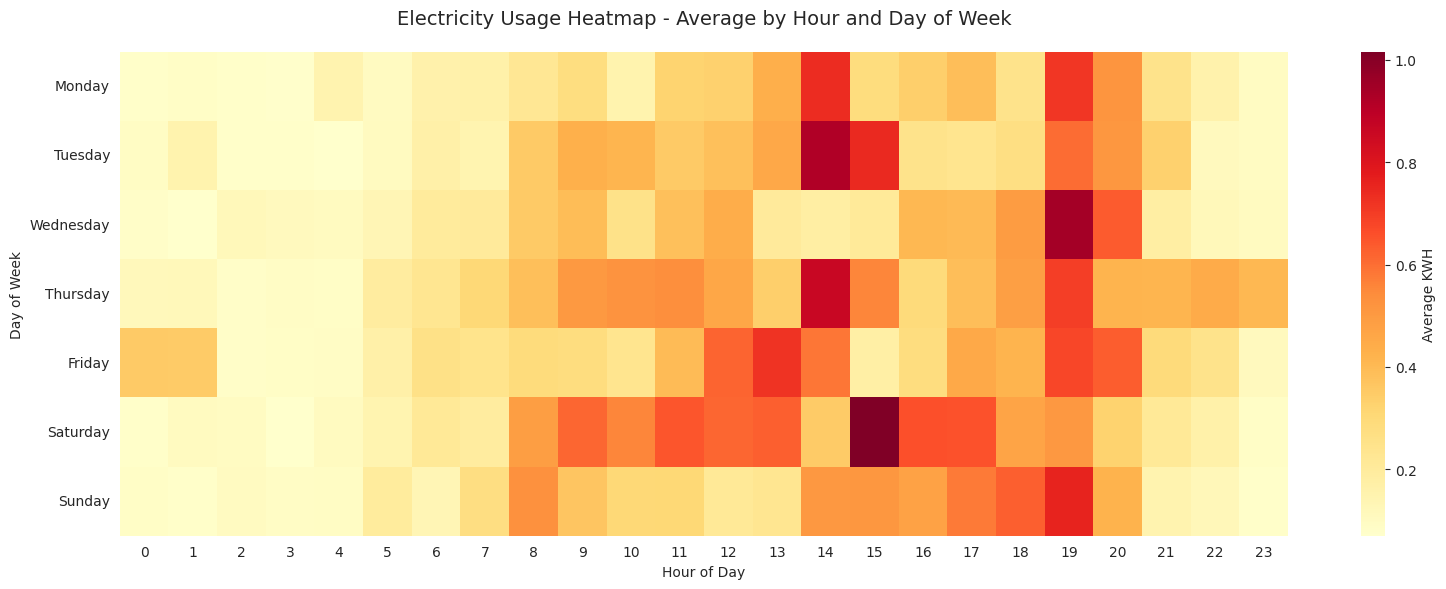

In [6]:
# For electricity data, create hourly heatmap
electric_df = df[df['utility_type'] == 'ELECTRIC'].copy()
electric_df['day_of_week'] = electric_df['datetime_utc'].dt.day_name()
electric_df['hour_of_day'] = electric_df['datetime_utc'].dt.hour

# Pivot for heatmap
heatmap_data = electric_df.pivot_table(
    values='usage_value',
    index='day_of_week',
    columns='hour_of_day',
    aggfunc='mean'
)

# Reorder days
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data.reindex([d for d in day_order if d in heatmap_data.index])

# Create heatmap
plt.figure(figsize=(16, 6))
sns.heatmap(
    heatmap_data, 
    cmap='YlOrRd', 
    annot=False, 
    fmt='.2f',
    cbar_kws={'label': 'Average KWH'}
)
plt.title('Electricity Usage Heatmap - Average by Hour and Day of Week', fontsize=14, pad=20)
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.tight_layout()
plt.show()

## 7. Comparison: Electricity vs Gas

In [7]:
# Create normalized comparison (scale to 0-100 for comparison)
from sklearn.preprocessing import MinMaxScaler

comparison_df = daily_df.copy()
scaler = MinMaxScaler(feature_range=(0, 100))

# Normalize each utility separately
for utility in comparison_df['utility_type'].unique():
    mask = comparison_df['utility_type'] == utility
    comparison_df.loc[mask, 'normalized_usage'] = scaler.fit_transform(
        comparison_df.loc[mask, 'usage_value'].values.reshape(-1, 1)
    )

# Plot normalized comparison
fig = px.line(
    comparison_df,
    x='datetime_utc',
    y='normalized_usage',
    color='utility_type',
    title='Normalized Usage Comparison (0-100 scale)',
    labels={
        'datetime_utc': 'Date',
        'normalized_usage': 'Normalized Usage (0-100)',
        'utility_type': 'Utility'
    },
    template='plotly_white'
)

fig.update_layout(height=500, hovermode='x unified')
fig.show()

## 8. Actual Costs from API Data

Now using the actual cost data provided by the utility API.

In [8]:
# Load actual cost data from API
cost_df = storage.read_usage_data(data_type='COST')

print(f"Loaded {len(cost_df):,} cost records")

# Aggregate to daily costs
daily_cost_df = cost_df.groupby([pd.Grouper(key='datetime_utc', freq='D'), 'utility_type']).agg({
    'usage_value': 'sum'  # usage_value contains dollar amounts for COST data
}).reset_index()
daily_cost_df.rename(columns={'usage_value': 'cost'}, inplace=True)

# Daily costs by utility
fig = px.bar(
    daily_cost_df,
    x='datetime_utc',
    y='cost',
    color='utility_type',
    title='Actual Daily Costs by Utility (from API)',
    labels={
        'datetime_utc': 'Date',
        'cost': 'Cost ($)',
        'utility_type': 'Utility'
    },
    template='plotly_white'
)

fig.update_layout(height=500, barmode='stack')
fig.show()

# Summary
print("\n=== Cost Summary ===")
total_cost = 0
for utility in daily_cost_df['utility_type'].unique():
    utility_cost = daily_cost_df[daily_cost_df['utility_type'] == utility]
    daily_avg = utility_cost['cost'].mean()
    total = utility_cost['cost'].sum()
    total_cost += total
    
    print(f"\n{utility}:")
    print(f"  Total: ${total:.2f}")
    print(f"  Daily Average: ${daily_avg:.2f}")
    print(f"  Projected Monthly: ${daily_avg * 30:.2f}")

print(f"\n{'='*40}")
print(f"TOTAL ACTUAL COST: ${total_cost:.2f}")
num_days = len(daily_cost_df['datetime_utc'].unique())
print(f"PROJECTED MONTHLY: ${(total_cost / num_days) * 30:.2f}")
print(f"(Based on {num_days} days of data)")

Loaded 5,689 cost records



=== Cost Summary ===

ELECTRIC:
  Total: $174.86
  Daily Average: $5.64
  Projected Monthly: $169.22

GAS:
  Total: $11.48
  Daily Average: $0.37
  Projected Monthly: $11.11

TOTAL ACTUAL COST: $186.34
PROJECTED MONTHLY: $180.33
(Based on 31 days of data)


## 9. Custom Date Range Analysis

Use the cells below to analyze specific date ranges or utility types.

In [9]:
# Customize these parameters
UTILITY_TYPE = "ELECTRIC"  # Options: "ELECTRIC", "GAS", "WATER", or None for all
START_DATE = None  # e.g., "2025-12-01" or None for all data
END_DATE = None    # e.g., "2025-12-13" or None for all data
DATA_TYPE = "USAGE"  # Options: "USAGE" or "COST"

# Load filtered data
custom_df = storage.read_usage_data(
    utility_type=UTILITY_TYPE,
    start_date=START_DATE,
    end_date=END_DATE,
    data_type=DATA_TYPE
)

print(f"Loaded {len(custom_df):,} records")
print(f"Date range: {custom_df['datetime_utc'].min()} to {custom_df['datetime_utc'].max()}")

# Plot
unit_label = 'Cost ($)' if DATA_TYPE == 'COST' else f"Usage ({custom_df['unit_of_measure'].iloc[0] if len(custom_df) > 0 else ''})"
fig = px.line(
    custom_df,
    x='datetime_utc',
    y='usage_value',
    title=f'{UTILITY_TYPE or "All Utilities"} {DATA_TYPE} - Custom Date Range',
    labels={
        'datetime_utc': 'Date/Time',
        'usage_value': unit_label
    },
    template='plotly_white'
)

fig.update_layout(height=500)
fig.show()

# Statistics
unit_str = '$' if DATA_TYPE == 'COST' else custom_df['unit_of_measure'].iloc[0] if len(custom_df) > 0 else ''
print(f"\n=== Statistics ===")
print(f"Total: {custom_df['usage_value'].sum():.2f} {unit_str}")
print(f"Average: {custom_df['usage_value'].mean():.2f}")
print(f"Max: {custom_df['usage_value'].max():.2f}")
print(f"Min: {custom_df['usage_value'].min():.2f}")

Loaded 2,848 records
Date range: 2025-11-13 18:45:00+00:00 to 2025-12-13 10:30:00+00:00



=== Statistics ===
Total: 1651.01 KWH
Average: 0.58
Max: 4.72
Min: 0.07


## 10. Peak Usage and Cost Analysis

Identify when you're using the most energy and spending the most money.

=== Top 10 Usage Periods by Utility ===


ELECTRIC:
             datetime_utc  usage_value unit_of_measure  hour
2025-12-06 15:15:00+00:00         4.72             KWH    15
2025-12-06 15:30:00+00:00         4.64             KWH    15
2025-12-11 14:00:00+00:00         4.47             KWH    14
2025-12-06 15:45:00+00:00         4.18             KWH    15
2025-12-13 08:15:00+00:00         4.12             KWH     8
2025-12-11 14:30:00+00:00         3.92             KWH    14
2025-12-06 16:00:00+00:00         3.89             KWH    16
2025-12-11 14:15:00+00:00         3.89             KWH    14
2025-12-06 16:15:00+00:00         3.76             KWH    16
2025-11-16 15:30:00+00:00         3.72             KWH    15

Average usage by hour of day:
hour
19    1.263917
14    1.070259
20    0.899833
15    0.883534
12    0.802586
Name: usage_value, dtype: float64

GAS:
             datetime_utc  usage_value unit_of_measure  hour
2025-11-13 20:00:00+00:00         10.0             FT3    20
2025

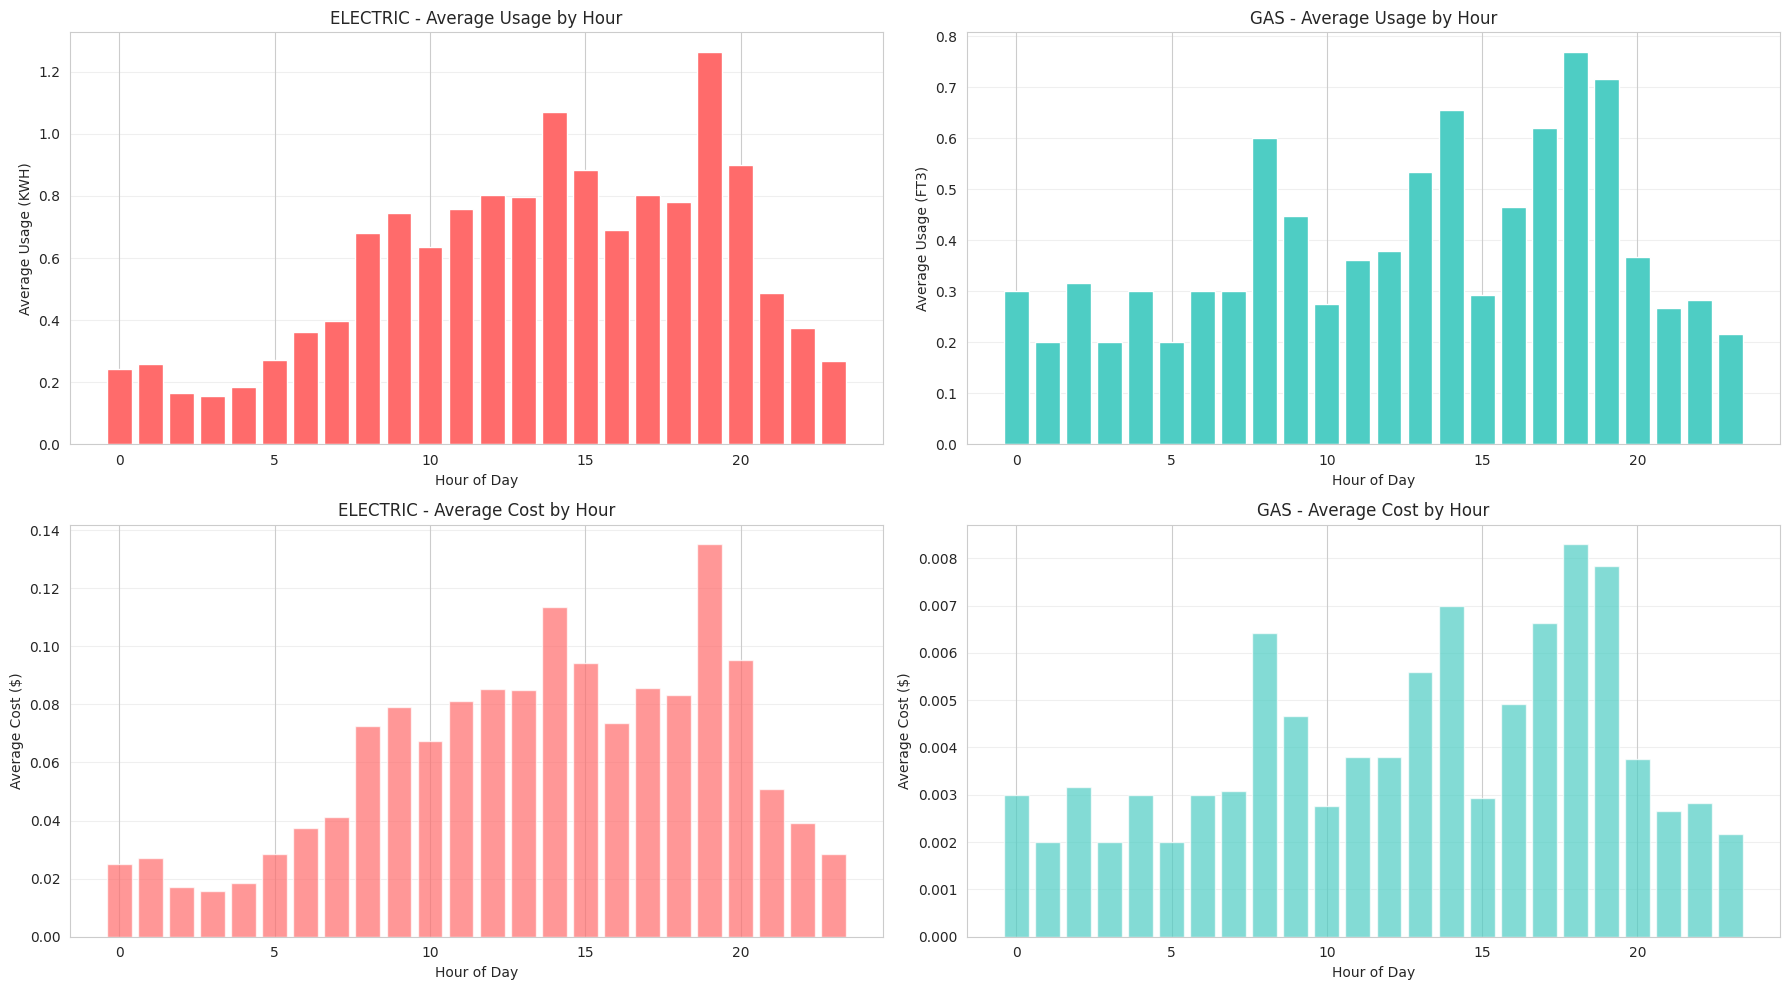

In [10]:
# Load both usage and cost data
usage_df = storage.read_usage_data(data_type='USAGE')
cost_data = storage.read_usage_data(data_type='COST')

print("=== Top 10 Usage Periods by Utility ===\n")

for utility in usage_df['utility_type'].unique():
    utility_data = usage_df[usage_df['utility_type'] == utility].copy()
    top_10 = utility_data.nlargest(10, 'usage_value')[['datetime_utc', 'usage_value', 'unit_of_measure', 'hour']]
    
    print(f"\n{utility}:")
    print(top_10.to_string(index=False))
    
    # Hour of day analysis
    print(f"\nAverage usage by hour of day:")
    hourly_avg = utility_data.groupby('hour')['usage_value'].mean().sort_values(ascending=False)
    print(hourly_avg.head(5))

print("\n\n=== Top 10 Cost Periods by Utility ===\n")

for utility in cost_data['utility_type'].unique():
    utility_cost = cost_data[cost_data['utility_type'] == utility].copy()
    top_10_cost = utility_cost.nlargest(10, 'usage_value')[['datetime_utc', 'usage_value', 'hour']]
    top_10_cost = top_10_cost.rename(columns={'usage_value': 'cost ($)'})
    
    print(f"\n{utility}:")
    print(top_10_cost.to_string(index=False))

# Visualize peak hours for usage
fig, axes = plt.subplots(2, len(usage_df['utility_type'].unique()), figsize=(18, 10))
if len(usage_df['utility_type'].unique()) == 1:
    axes = axes.reshape(-1, 1)

for idx, utility in enumerate(usage_df['utility_type'].unique()):
    # Usage by hour
    utility_usage = usage_df[usage_df['utility_type'] == utility]
    hourly_avg_usage = utility_usage.groupby('hour')['usage_value'].mean()
    unit = utility_usage['unit_of_measure'].iloc[0]
    
    axes[0, idx].bar(hourly_avg_usage.index, hourly_avg_usage.values, color=colors.get(utility, '#95E1D3'))
    axes[0, idx].set_title(f'{utility} - Average Usage by Hour')
    axes[0, idx].set_xlabel('Hour of Day')
    axes[0, idx].set_ylabel(f'Average Usage ({unit})')
    axes[0, idx].grid(axis='y', alpha=0.3)
    
    # Cost by hour
    utility_cost = cost_data[cost_data['utility_type'] == utility]
    hourly_avg_cost = utility_cost.groupby('hour')['usage_value'].mean()
    
    axes[1, idx].bar(hourly_avg_cost.index, hourly_avg_cost.values, color=colors.get(utility, '#95E1D3'), alpha=0.7)
    axes[1, idx].set_title(f'{utility} - Average Cost by Hour')
    axes[1, idx].set_xlabel('Hour of Day')
    axes[1, idx].set_ylabel('Average Cost ($)')
    axes[1, idx].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()